## Завантаженян бібліотек

In [2]:
import numpy as np
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('./howpop_train.csv')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [3]:
data.shape

(134137, 17)

In [4]:
data.head(5).T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [5]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,       # axis = 1: стовбці 
        inplace = True) # позбавляє від необхідності зберігати датасет

## Test

In [6]:
data.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [7]:
data.describe(include = ['object', 'bool']).T # бінарні і категоріальні змінні

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


## налаштування зовнішнього вигляду графіків в seaborn

In [8]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

#### Стовбець published (час публікації) містить рядки. Щоб ми мали змогу працювати з цими даними як з датою/часом публікації, приведемо їх до типу datetime:

In [9]:
print(data.published.dtype)
data['published'] = pd.to_datetime(data.published, yearfirst = True)
print(data.published.dtype)

object
datetime64[ns]


#### Створимо декілька стовбців на основі даних про час публікації:

In [10]:
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]

data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

## Test

In [11]:
data.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


### 1. В якому місяці (і якого року) було більше всього публікацій?
### березень 2016
### березень 2015
### квітень 2015
### квітень 2016

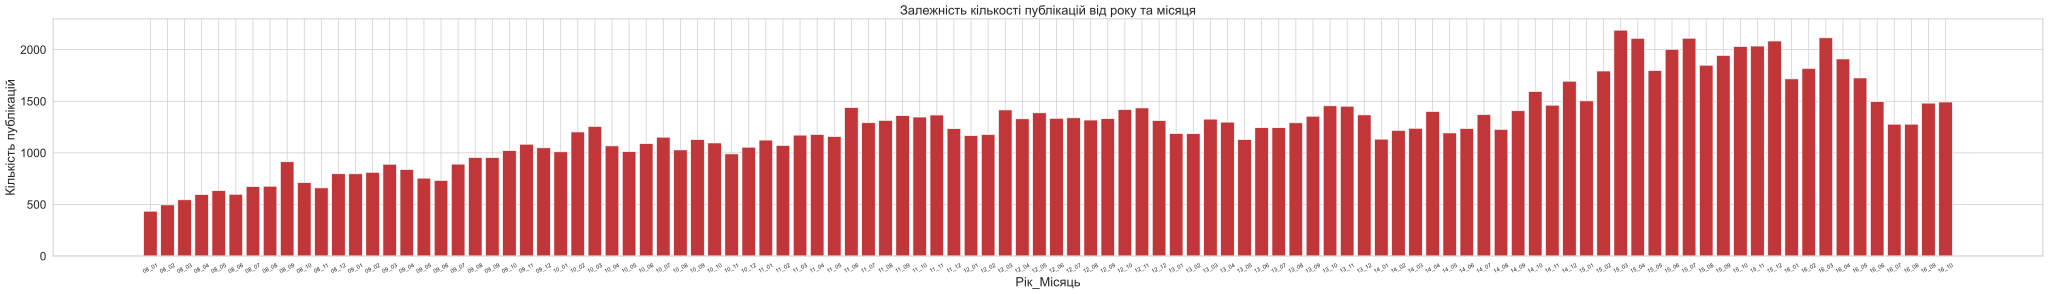

In [65]:

# Групування публікацій за роками та місяцями та підрахунок кількості
grouped_data = data.groupby(['year', 'month']).size().reset_index(name='count')

# Побудова графіку
plt.figure(figsize=(50, 6))
years_months = grouped_data['year'].astype(str).str[2:] + '_' + grouped_data['month'].astype(str).str.zfill(2)
plt.bar(years_months, grouped_data['count']) # тип- гістограма

# Встановлення підписів на вісі x
plt.xticks(years_months, rotation=25, fontsize=8)  # Зменшити розмір шрифту до 8 пунктів (або іншого розміру за потреби)
plt.xlabel('Рік_Місяць')
plt.ylabel('Кількість публікацій')
plt.title('Залежність кількості публікацій від року та місяця')

plt.grid(True)

plt.show()

#### Відповідь: 2015 - березень

## 2\. Проаналізуйте публікації в місяці з попереднього питання(березень 2016)

Виберіть один чи декілька варіантів:

* Один чи декілька днів сильно виділяються із загальної картини
* На хабрі _завжди_ більше статей, ніж на гіктаймсі
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей

Підказки: побудуйте графік залежності числа публікацій від дня; використовуйте параметр `hue`; не переймайтесь сильно з відповідями і не шукайте прихованого змісту :)

In [65]:
#Відділяємо дані лише із правильної відповіді березень 2016
data_march = data[(data['year'] == 2016) & (data['month'] == 3)]

data_march.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2115 entries, 121357 to 123471
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   url          2115 non-null   object        
 1   domain       2115 non-null   object        
 2   post_id      2115 non-null   int64         
 3   published    2115 non-null   datetime64[ns]
 4   author       1267 non-null   object        
 5   flow         1323 non-null   object        
 6   polling      2115 non-null   bool          
 7   content_len  2115 non-null   int64         
 8   title        2115 non-null   object        
 9   comments     2115 non-null   int64         
 10  favs         2115 non-null   int64         
 11  views        2115 non-null   int64         
 12  votes_plus   2115 non-null   float64       
 13  votes_minus  2115 non-null   float64       
 14  year         2115 non-null   int64         
 15  month        2115 non-null   int64         
 16  dayo

c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

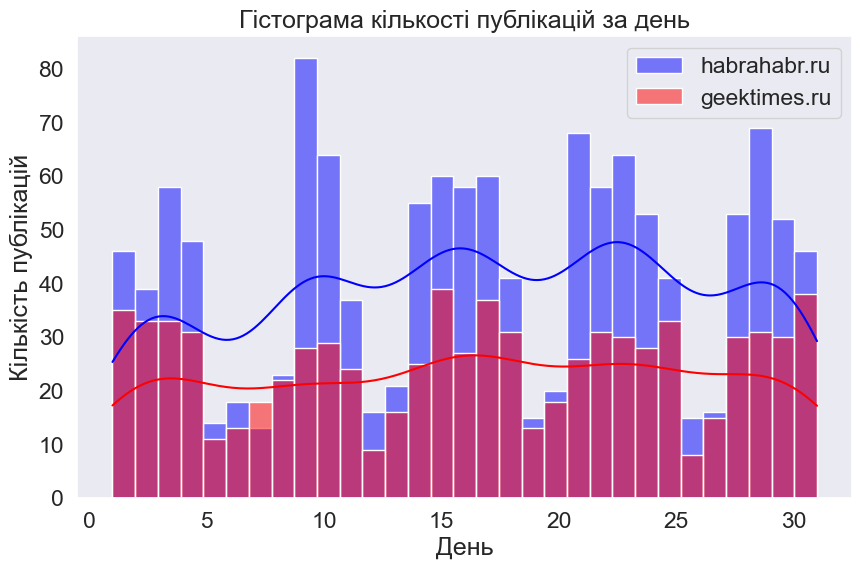

In [71]:
# Встановлення стилів Seaborn (необов'язково)
# Фільтрація даних для "habrahabr.ru"
data_habrahabr = data_march[data_march['domain'] == 'habrahabr.ru']

# Фільтрація даних для "geektimes"
data_geektimes = data_march[data_march['domain'] == 'geektimes.ru']

# Побудова гістограми для "habrahabr.ru"
plt.figure(figsize=(10, 6))
sns.histplot(data_habrahabr['published'].dt.day, bins=31, kde=True, label='habrahabr.ru', color='blue')

# Побудова гістограми для "geektimes"
sns.histplot(data_geektimes['published'].dt.day, bins=31, kde=True, label='geektimes.ru', color='red')

# Налаштування підписів на вісі x та y
plt.xlabel('День')
plt.ylabel('Кількість публікацій')
plt.title('Гістограма кількості публікацій за день')

# Відображення легенди
plt.legend()

# Показ графіку
plt.show()


* Один чи декілька днів сильно виділяються із загальної картини - так
* На хабрі _завжди_ більше статей, ніж на гіктаймсі - так 
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей - ні

## 3\. Коли найкраще всього опублікувати статтю?


c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

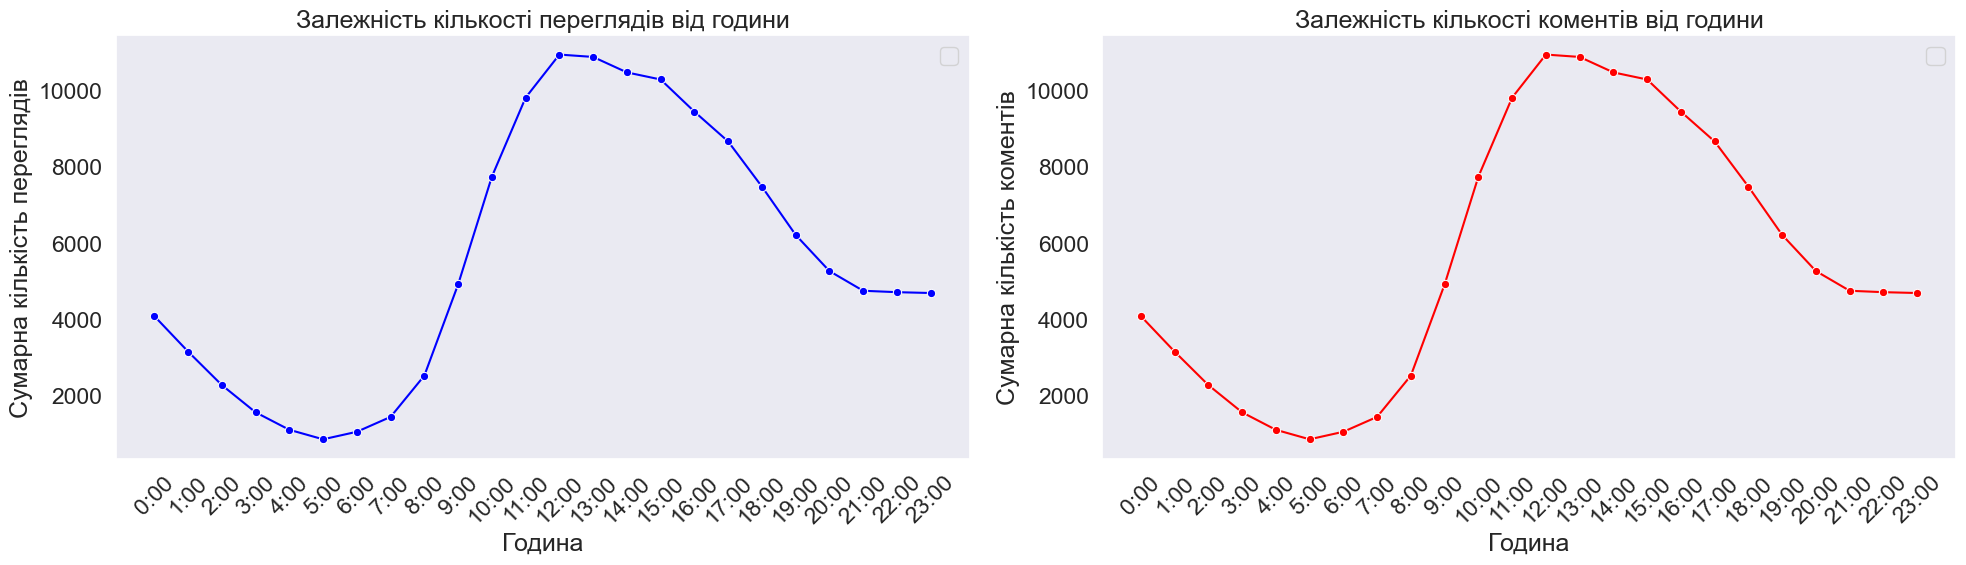

In [72]:
group_hour = data.groupby('hour')
# Сумування кількості переглядів та коментів
sum_views = group_hour['views'].count()
count_comments = group_hour['comments'].count()


#Побудова графіку 1
hour_labels = [f"{hour}:00" for hour in sum_views.index]
views_values = sum_views.values

plt.figure(figsize=(20, 6))  # Змінимо розмір фігури, щоб вмістити обидва графіки

plt.subplot(1, 2, 1)
sns.lineplot(x=hour_labels, y=views_values, marker='o', color='blue')

plt.xlabel('Година')
plt.ylabel('Сумарна кількість переглядів')
plt.title('Залежність кількості переглядів від години')

plt.xticks(rotation=45)
plt.legend()

#Побудова графіку 2
comment_values = count_comments.values

plt.subplot(1, 2, 2)
sns.lineplot(x=hour_labels, y=comment_values, marker='o', color='red')

plt.xlabel('Година')
plt.ylabel('Сумарна кількість коментів')
plt.title('Залежність кількості коментів від години')

plt.xticks(rotation=45)
plt.legend()

# # Показ графіку
plt.tight_layout()
plt.show()

c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

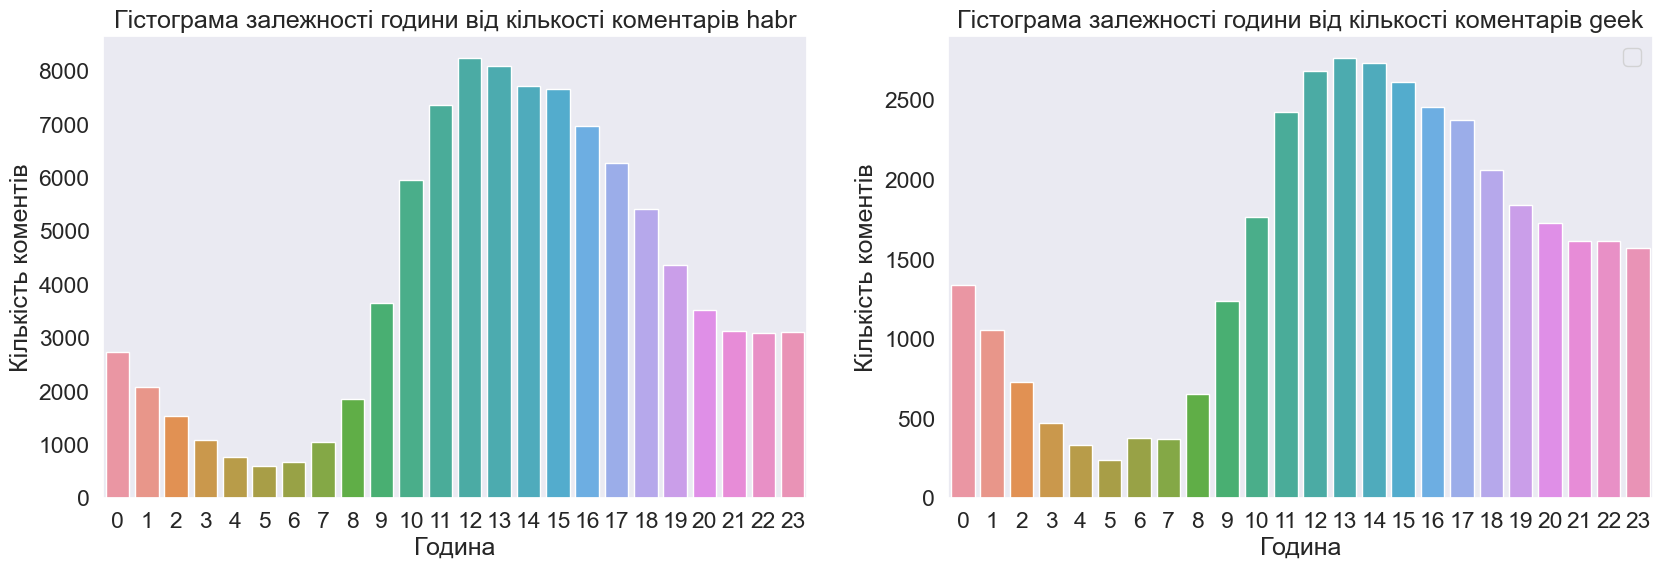

In [33]:
# Частина, де потрібно кількість гіткаймс та хабр(коментарі) за певну годину

# 1)Фільтрація гіткаймс і хабр доменів окремо


data_habr = data[(data['domain'] == 'habrahabr.ru')]
data_geektimes = data[(data['domain'] == 'geektimes.ru')]

#дає можливість групувати дані за певним 
#критерієм і після групування завдяки reset_index() відділяються ті колонки котрі ми можемо використати для групування
habr_comments = data_habr.groupby('hour')['comments'].count().reset_index()
geektimes_comments = data_geektimes.groupby('hour')['comments'].count().reset_index() 


# Побудова графіку гістограми


plt.figure(figsize=(20, 6))  # Змінимо розмір фігури, щоб вмістити обидва графіки

plt.subplot(1, 2, 1)

sns.barplot(x='hour', y='comments', data=habr_comments)


# Налаштування осей та назв графіка
plt.xlabel('Година')
plt.ylabel('Кількість коментів')
plt.title('Гістограма залежності години від кількості коментарів habr')

plt.subplot(1, 2, 2)
sns.barplot(x='hour', y='comments', data=geektimes_comments)
plt.xlabel('Година')
plt.ylabel('Кількість коментів')
plt.title('Гістограма залежності години від кількості коментарів geek')

# Відображення графіка
plt.show()









### Відповіді

* Більш всього переглядів набирають статті, опубліковані в 12 годин дня - так
* В опублікованих о 10-й ранку постів більше всього коментарів - ні
* Більше всього переглядів набирають статті, опубліковані в 6 годин ранку - ні
* Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора - ні
* На хабрі денні статті комментують частіше, ніж вечірні - ні

# 4. Кого з топ-20 авторів частіше всього мінусують?

### Сорутвання даних

c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


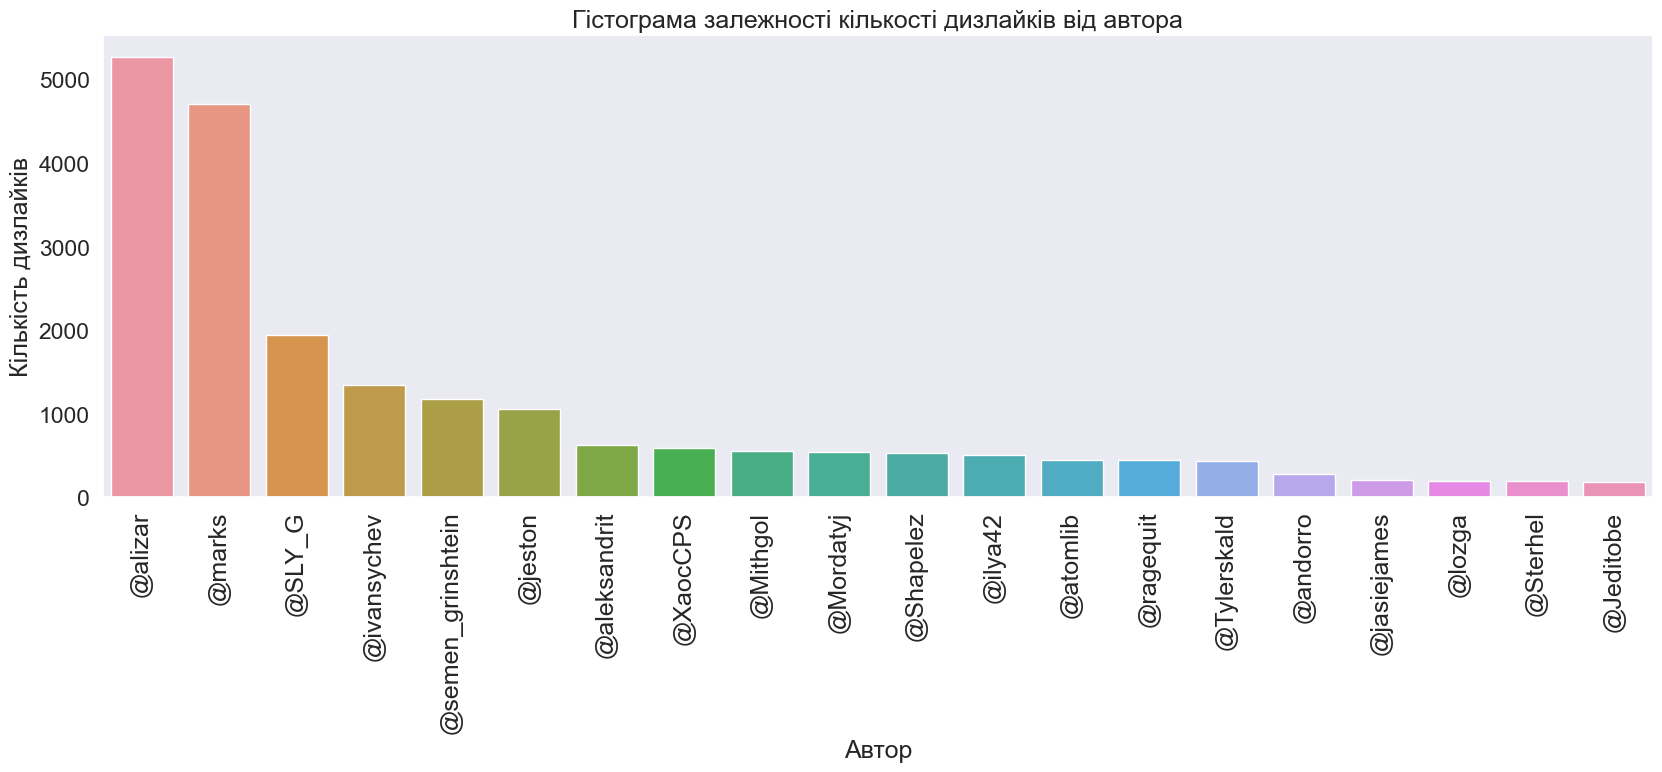

In [54]:
# Сортуємо та фільтруємо дані
top_sort = data.groupby('author')['votes_minus'].count().reset_index() 

top_sort = top_sort.sort_values(by='votes_minus', ascending=False)

top_sort = top_sort.head(20)

top_sort

# Будуємо графік

plt.figure(figsize=(20, 6))  # Змінимо розмір фігури, щоб вмістити обидва графіки


plot = sns.barplot(x='author', y='votes_minus', data=top_sort)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=18)

# Налаштування осей та назв графіка
plt.xlabel('Автор')
plt.ylabel('Кількість дизлайків')
plt.title('Гістограма залежності кількості дизлайків від автора')


plt.show()



### Відповідь: @alizar

## 5\. Порівняйте суботи і понеділки

Чи правда, що по суботам автори пишуть в основному вдень, а по понеділкам — в основному вечером?

C:\Users\Богдан\AppData\Local\Temp\ipykernel_5888\1725447898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_day['day'] = two_day['dayofweek'].map({2: 'Monday', 6: 'Saturday'})
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Богдан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector

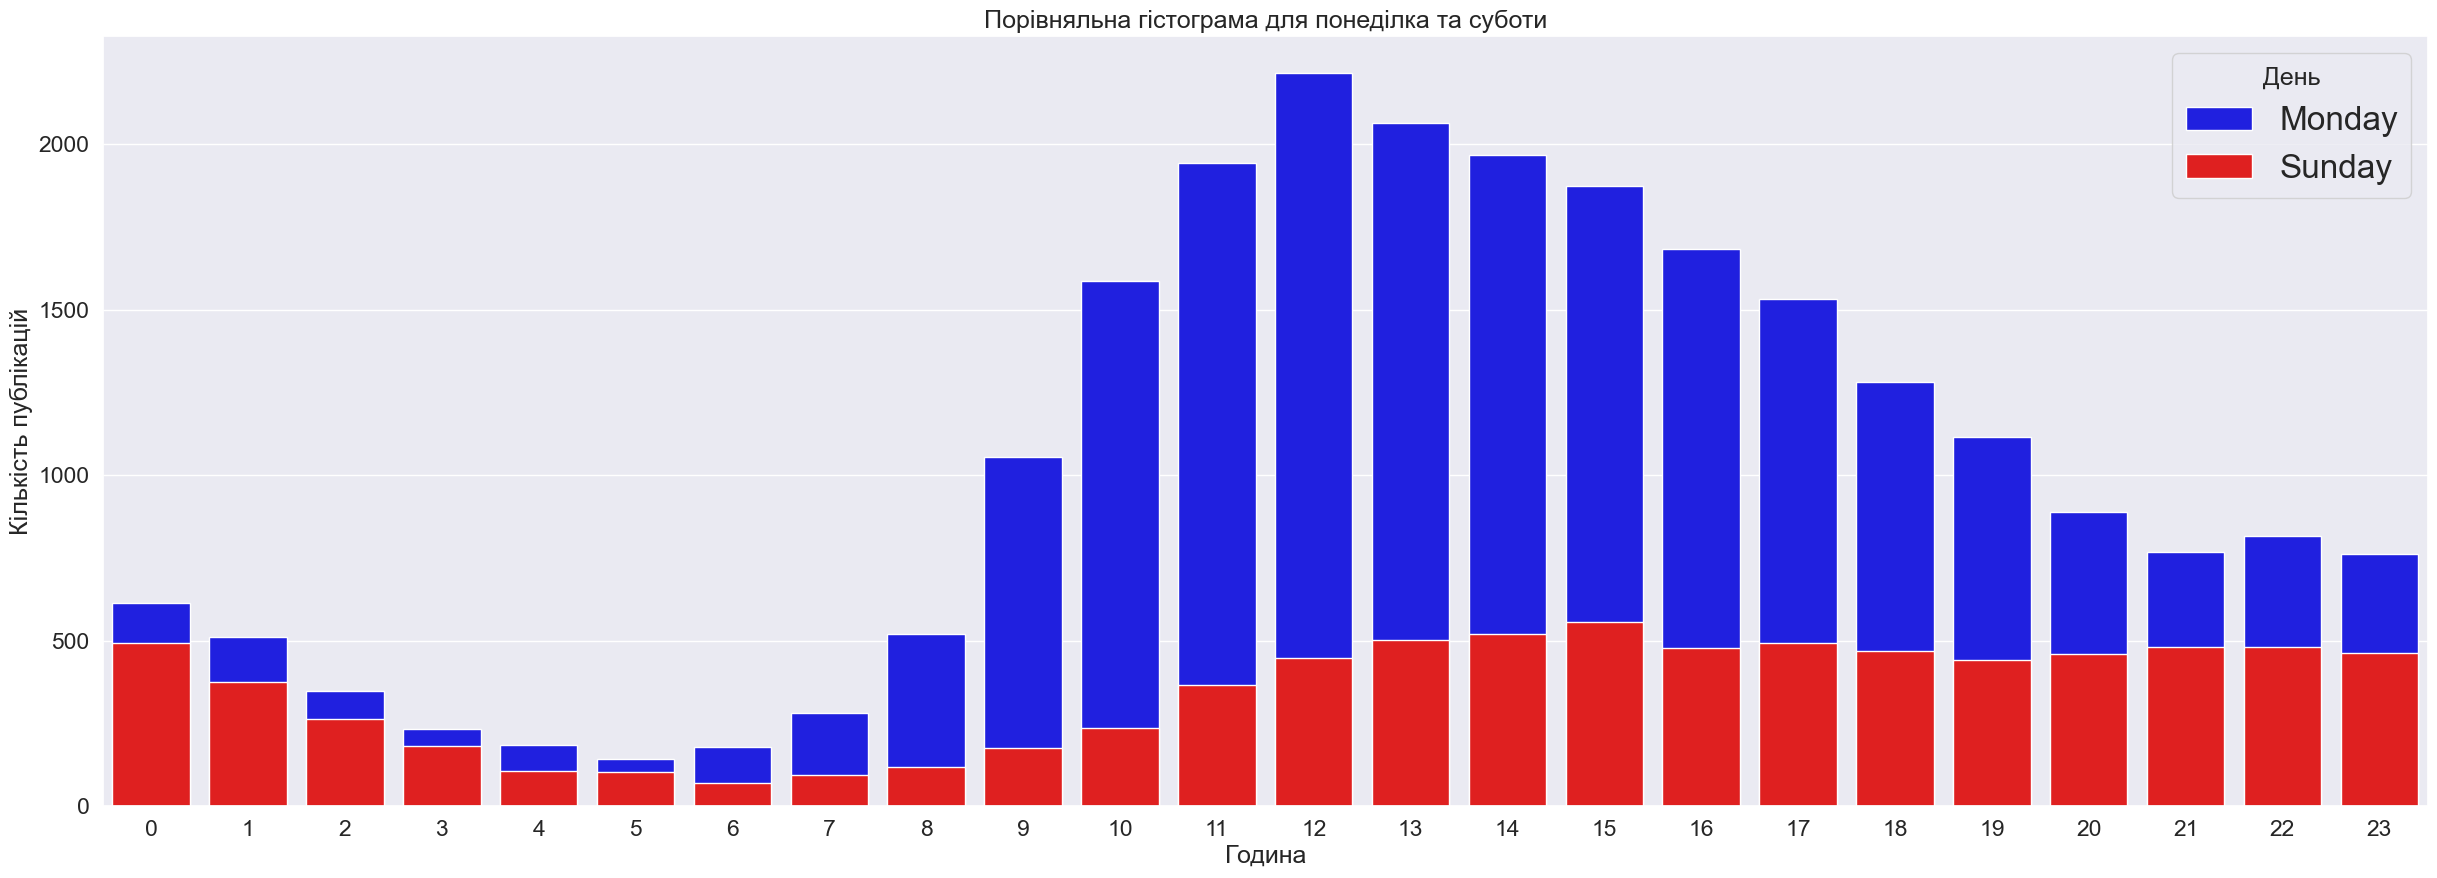

In [116]:
two_day = data[(data['dayofweek'] == 2) | (data['dayofweek'] == 6)]

# Побудова графіка
plt.figure(figsize=(30, 10))

# Перетворюємо ваші дані так, щоб було два окремі стовпці для днів тижня
two_day['day'] = two_day['dayofweek'].map({2: 'Monday', 6: 'Saturday'})

two_day = two_day.groupby(['day', 'hour'])['published'].count().reset_index()

day_monday = two_day[(two_day['day'] == 'Monday')]

day_saturday = two_day[(two_day['day'] == 'Saturday')]

sns.set_style("darkgrid")

# Використовуємо Seaborn для побудови boxplot
sns.barplot(data=day_monday, x='hour', y='published', color='blue', label='Monday')

# Побудова гістограми для "geektimes"
sns.barplot(data=day_saturday, x='hour', y='published', color='red', label='Sunday')


# Налаштовуємо осі та назву графіка
plt.xlabel('Година')
plt.ylabel('Кількість публікацій')
plt.title('Порівняльна гістограма для понеділка та суботи')
plt.legend(title='День', loc='upper right', fontsize='24')
plt.show()

### Відповіді
по суботам автори пишуть в основному вдень - так

по понеділкам — в основному вечером - ні 